In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from visualization.utils.cls_helpers import (
    compute_metrics, 
    plot_cls_metrics, 
    plot_relative_cls, 
    plot_relative_cls_summarization, 
    plot_cls_P_R,
    plot_distributions,
    plot_batch_times
    )

### Paths preparation

In [3]:
# List of classes
classes = ['Data Science and Machine Learning', 'Database and SQL', 'GUI and Desktop Applications', 
           'Networking and APIs', 'Other', 'Python Basics and Environment', 
           'System Administration and DevOps', 'Web Development']

In [4]:
# Paths
project_path = '/home/arazin/main/work/HUAWEI/SRC/SRC_from_remote/SRC_QC4QA'

# teacher/student distillation paths
teacher = '/data/inference/cls/teacher.csv'
student = '/data/inference/cls/student.csv'

teacher_times = '/data/inference/cls/batch_inference_times_teacher.csv'
student_times = '/data/inference/cls/batch_inference_times_student.csv'

# summarization paths
base_classifier = '/data/inference/summarization/cls_inference_without_summarization.csv'
classifier_with_summarization = '/data/inference/summarization/cls_inference_with_summarization.csv'

In [5]:
# DataFrames

# teacher/student distillation dfs
teacher = pd.read_csv(project_path + teacher, index_col=0)
student = pd.read_csv(project_path + student)

student_times = pd.read_csv(project_path + student_times)
teacher_times = pd.read_csv(project_path + teacher_times)

# summarization dfs
base_classifier = pd.read_csv(project_path + base_classifier)
classifier_with_summarization = pd.read_csv(project_path + classifier_with_summarization)

### Check Metrics for Full model

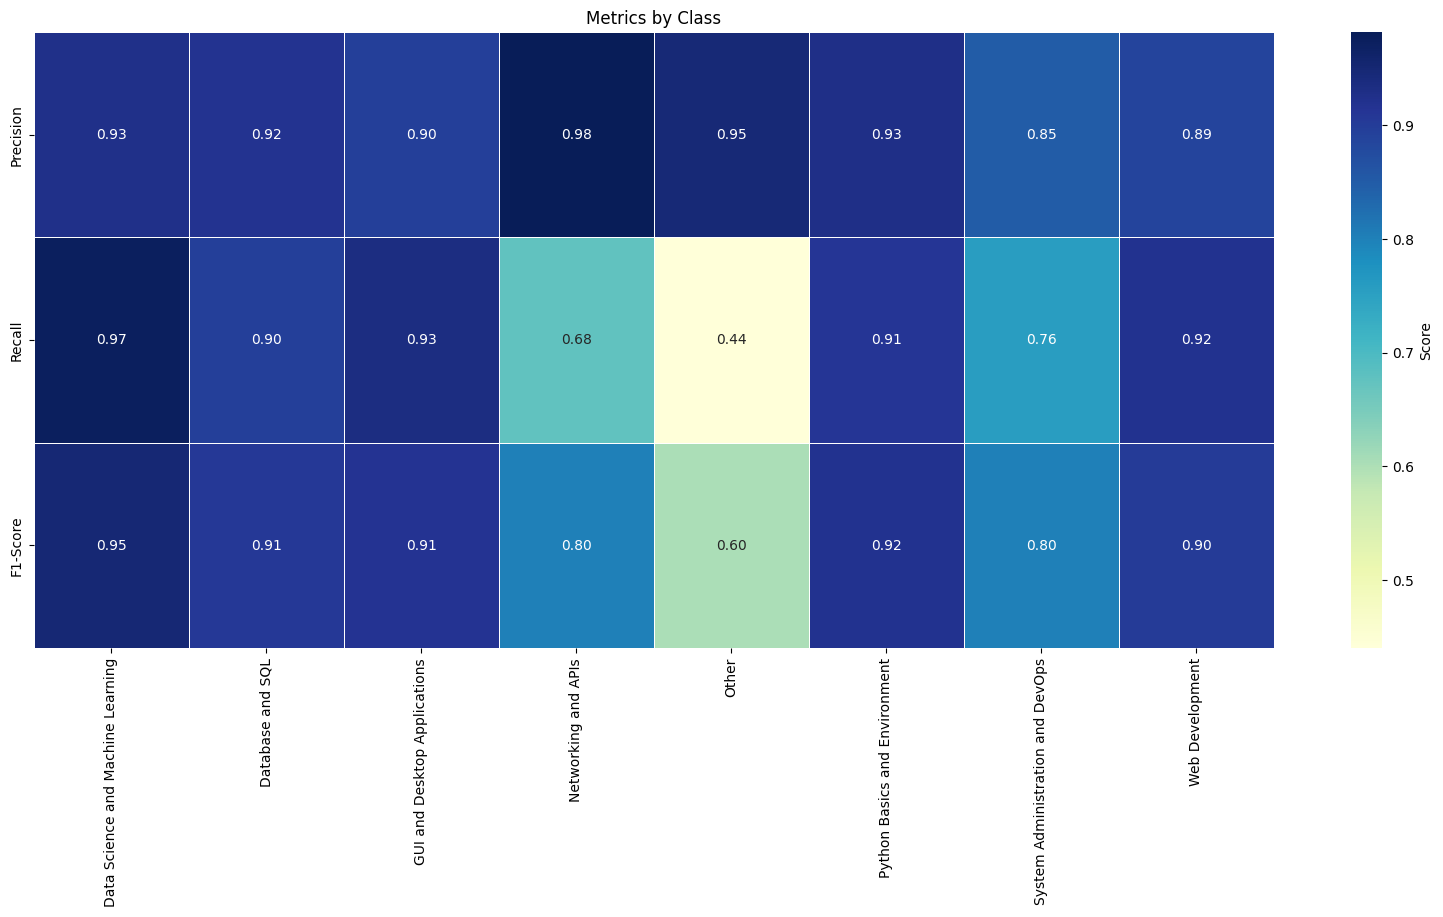

In [6]:
plot_cls_metrics(teacher)

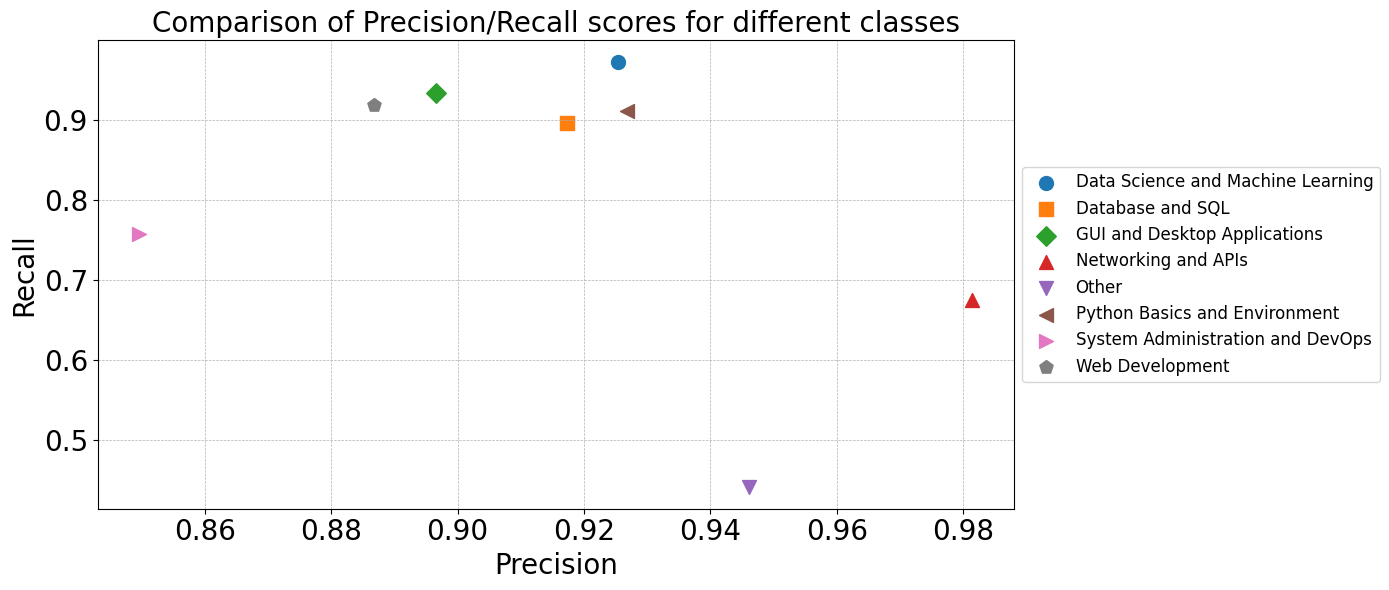

In [7]:
plot_cls_P_R(teacher)

### Check Metrics for Distilled model

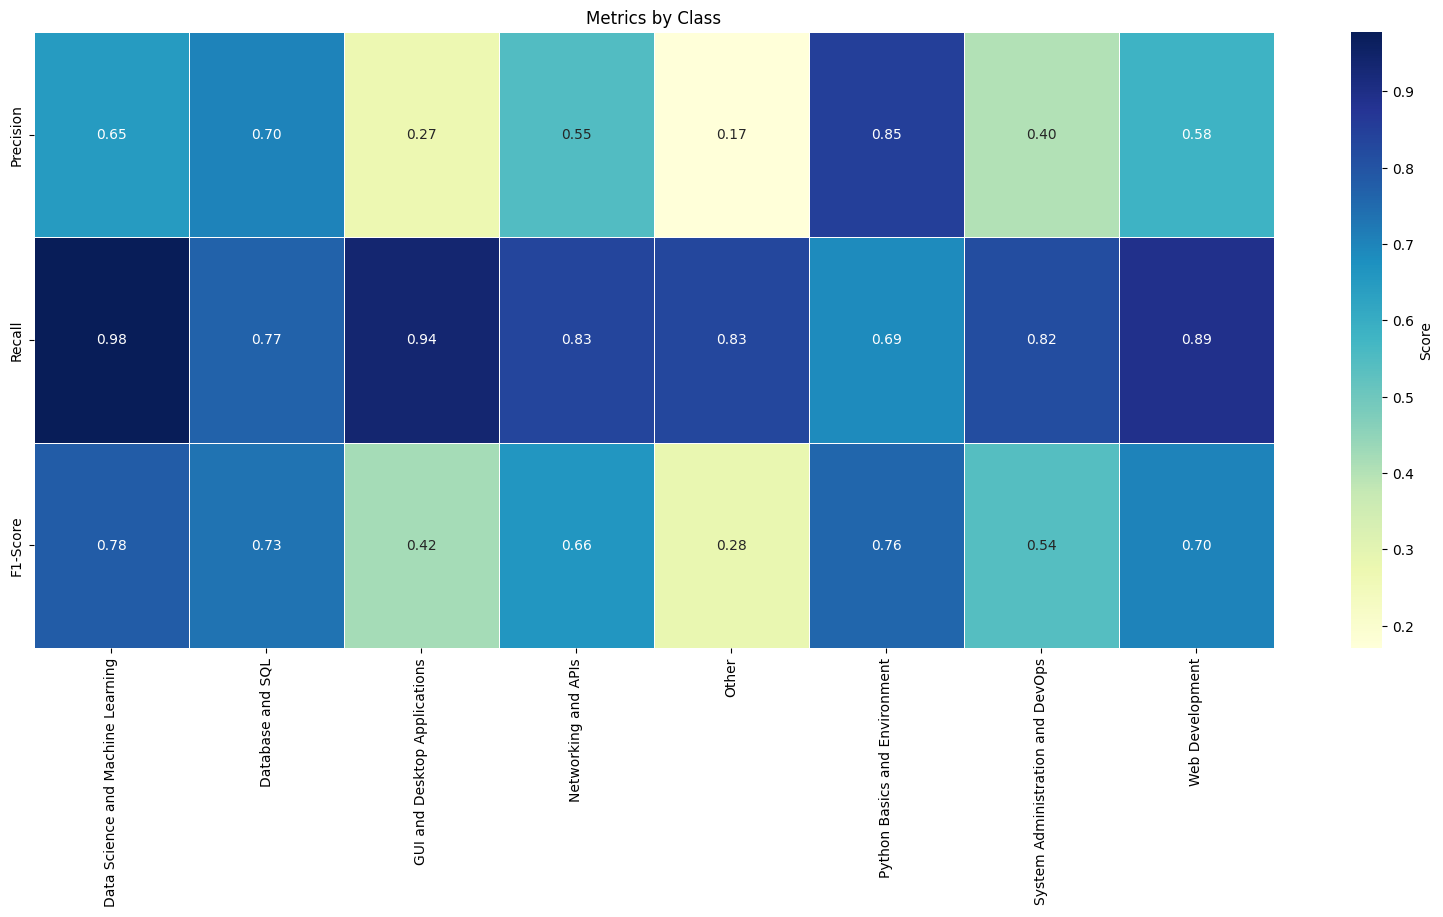

In [8]:
plot_cls_metrics(student)

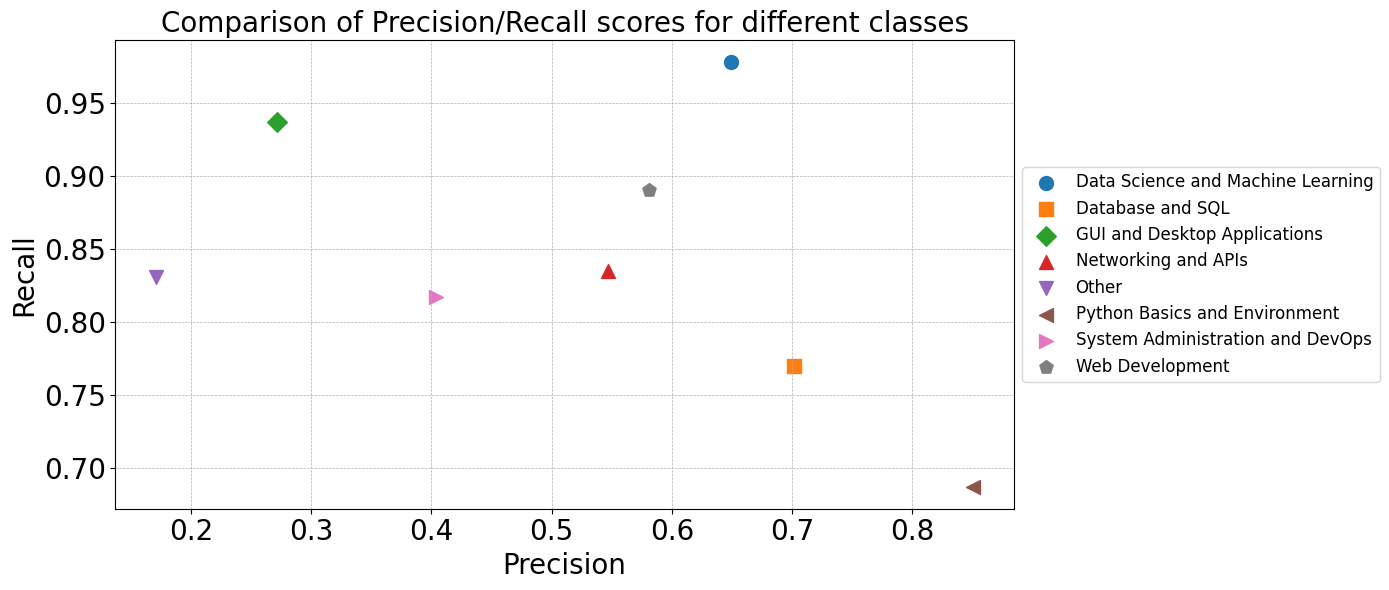

In [9]:
plot_cls_P_R(student)

### Check relative comparison for Distilled model and Full model metrics

#### Metrics

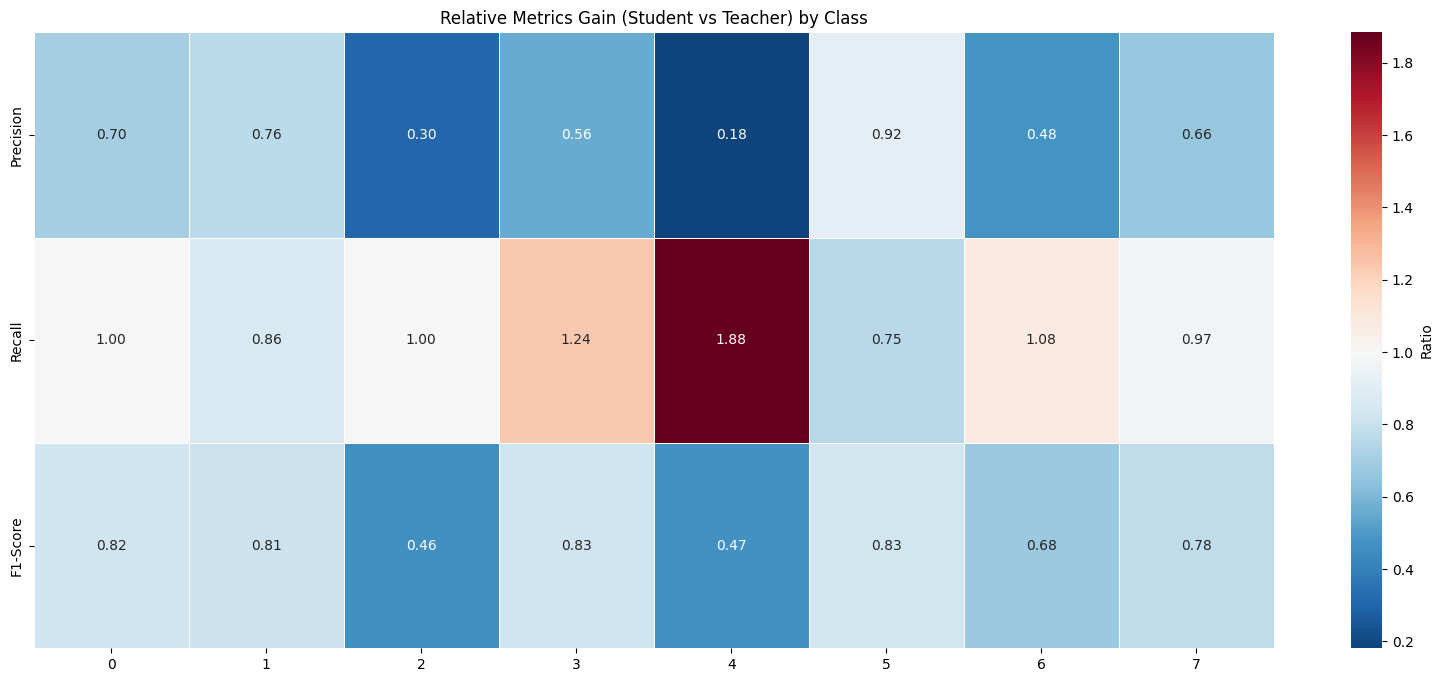

In [10]:
plot_relative_cls(teacher, student)

#### Times

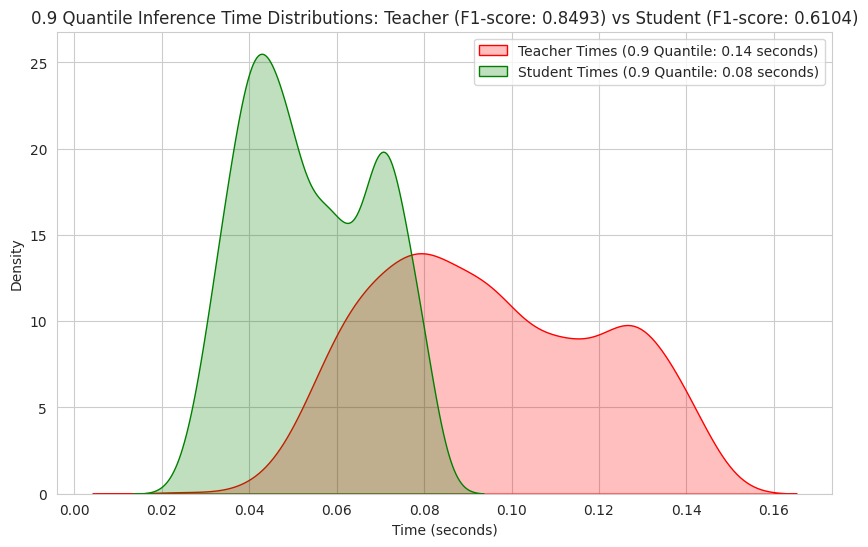

In [11]:
plot_distributions(
    teacher_times.values.squeeze(), 
    student_times.values.squeeze(), 
    round(np.mean(compute_metrics(teacher)['F1-Score']), 4), 
    round(np.mean(compute_metrics(student)['F1-Score']), 4)
    )

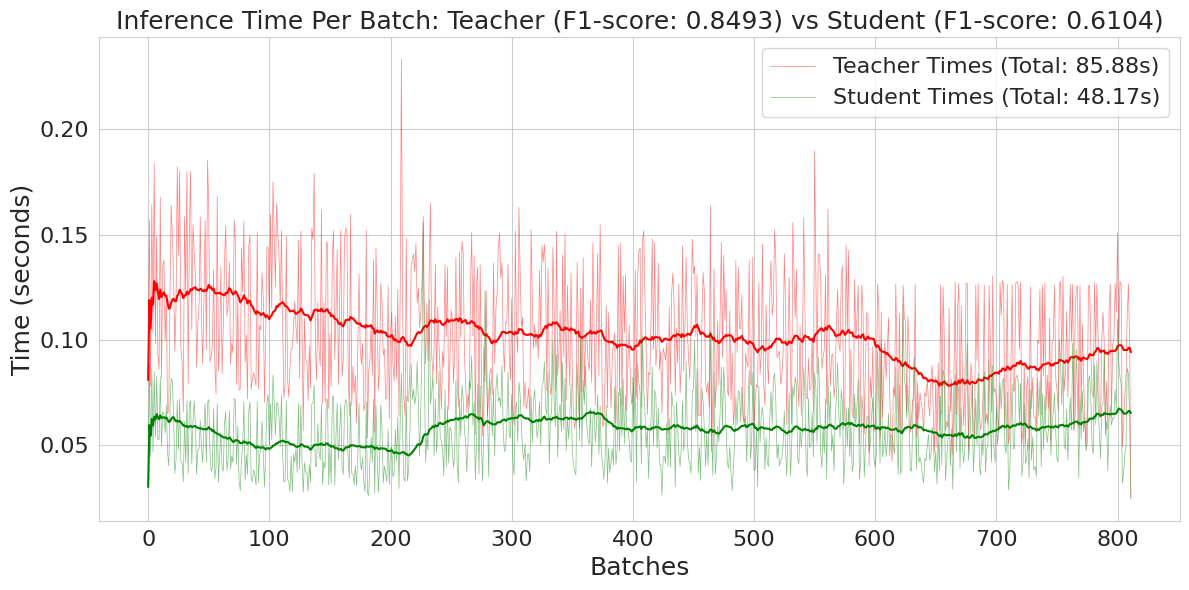

In [12]:
plot_batch_times(
    teacher_times.values.squeeze(), 
    student_times.values.squeeze(), 
    round(np.mean(compute_metrics(teacher)['F1-Score']), 4), 
    round(np.mean(compute_metrics(student)['F1-Score']), 4)
    )

### Check Code summarization influence on CLS metrics

In [13]:
base_classifier['Label'] = base_classifier['Label'].apply(lambda x: list(map(int, x.strip('[]').split())))
classifier_with_summarization['Label'] = classifier_with_summarization['Label'].apply(lambda x: list(map(int, x.strip('[]').split())))

In [14]:
for df in [base_classifier, classifier_with_summarization]:
    for i, name in enumerate(classes):
        df.rename(columns={name: name + '.1'}, inplace=True)
        df[name] = df['Label'].apply(lambda x: x[i])

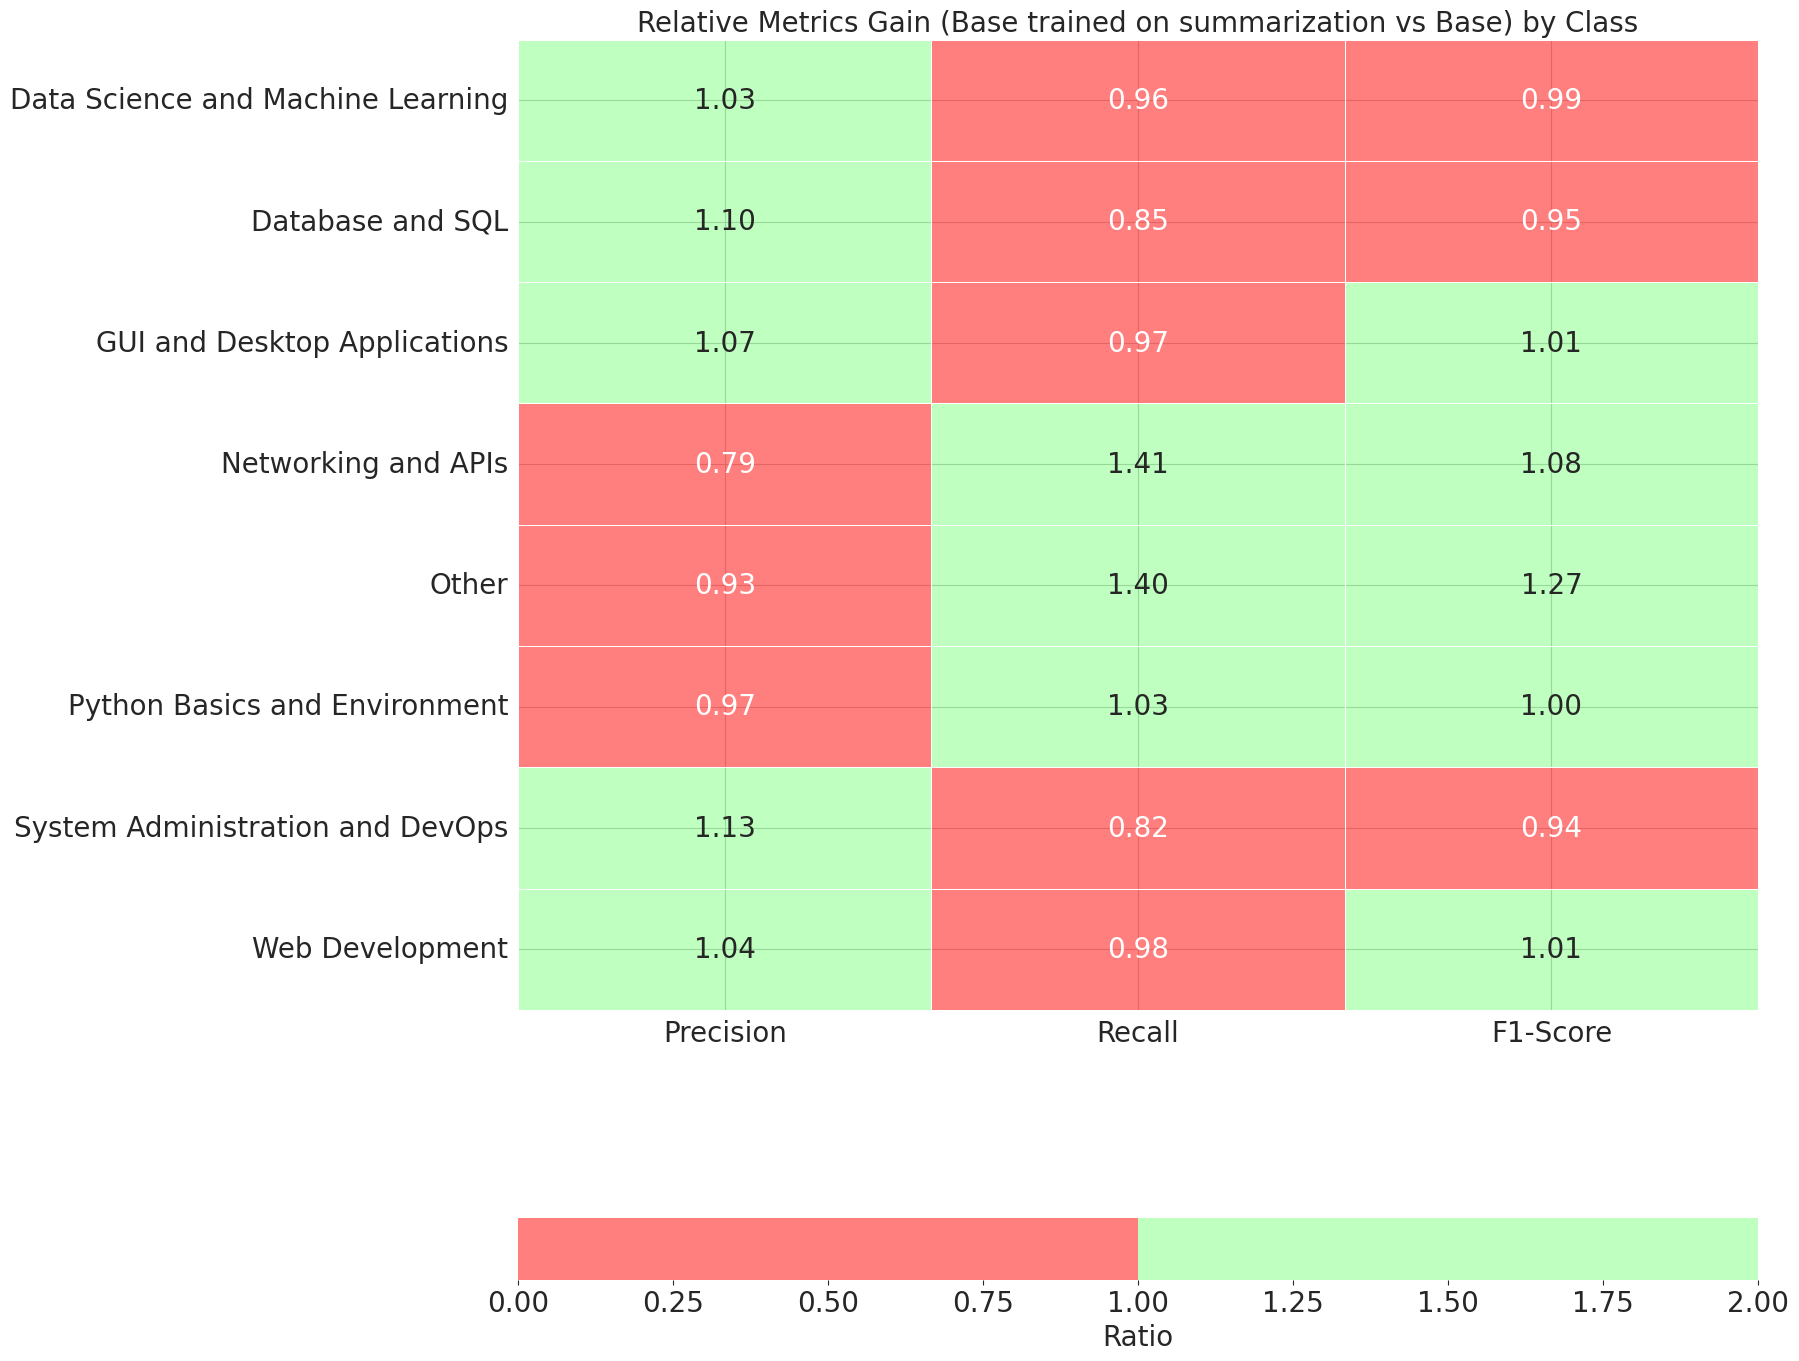

In [15]:
plot_relative_cls_summarization(base_classifier, classifier_with_summarization)